Goal is to make a 1D simulation of our experiment.

- We need a way of simulating an electromagnet and changing its properties for a set period
- An Object that is able to interact with electromagnet for a set period
- We need a way of introducing noise artificially to move the object (and magnet?)
- A method of calculating the distance between the object and the magnet
- PID that takes in this distance which then adjusts the electromagnet
- Method of plotting how the distance changes over time


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import main

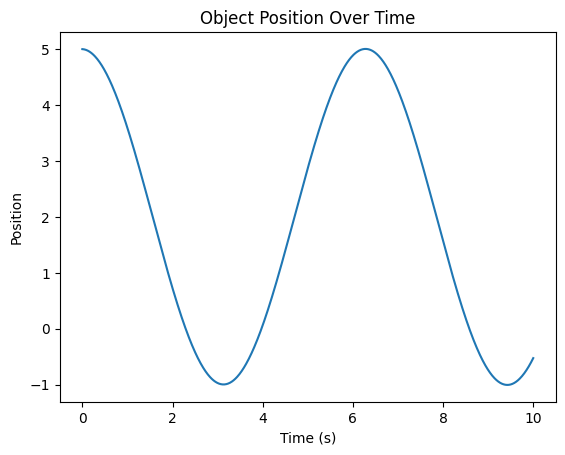

In [7]:
# Constants
dt = 0.01  # Time step
total_time = 10  # Total simulation time
steps = int(total_time / dt)

# PID controller setup
Kp, Ki, Kd = 1, 0.1, 0.05
pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Simulation loop
magnet = main.Electromagnet()
obj = main.Object()
setpoint = 2  # Desired position

positions = []

for _ in range(steps):
    distance = obj.position  # Distance from electromagnet at x=0
    error = setpoint - distance
    
    # PID control (basic implementation)
    control_signal = Kp * error  # Simplified P-controller for now
    magnet.update(control_signal)

    # Apply force & noise
    noise = main.noise_generator()
    obj.apply_force(magnet.force, noise)

    positions.append(obj.position)

# Plot results
plt.plot(np.linspace(0, total_time, steps), positions)
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.title("Object Position Over Time")
plt.show()

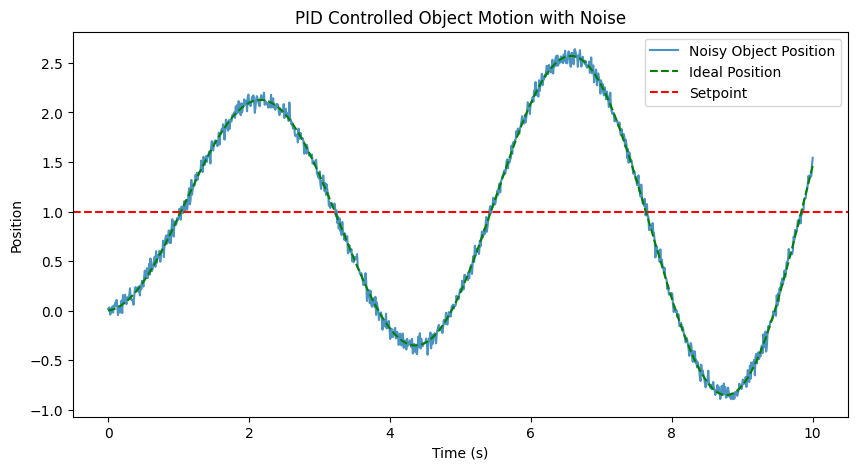

In [8]:
# Define the PID controller parameters
Kp, Ki, Kd = 2.0, 0.5, 0.1  # Tune these values

# Create the PID transfer function
pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Define the object’s dynamics (mass-spring-damper system)
mass = 1.0  # Mass of object
G_s = ctrl.TransferFunction([1], [mass, 0, 0])  # 1/(ms^2)

# Closed-loop system with feedback
H_s = ctrl.feedback(pid_controller * G_s, 1)

# Time vector
t = np.linspace(0, 10, 1000)  # Simulate for 10 seconds

# Step response (assuming setpoint = 1)
t_out, y_out = ctrl.forced_response(H_s, T=t, U=np.ones_like(t))

# Generate noise
noise = np.random.normal(0, 0.05, size=len(t))  # Gaussian noise

# Apply noise to the response
y_noisy = y_out + noise

# Plot the response
plt.figure(figsize=(10, 5))
plt.plot(t_out, y_noisy, label="Noisy Object Position", alpha=0.8)
plt.plot(t_out, y_out, label="Ideal Position", linestyle="--", color="g")
plt.axhline(1, color="r", linestyle="--", label="Setpoint")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.title("PID Controlled Object Motion with Noise")
plt.legend()
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the PID controller parameters
Kp, Ki, Kd = 2.0, 0.5, 0.1  # Tune these values

# Create the PID transfer function
pid_controller = ctrl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Define the object's dynamics (1D motion)
mass = 1.0  # Mass of object
G_s = ctrl.TransferFunction([1], [mass, 0, 0])  # 1/(ms^2)

# Closed-loop system with feedback
H_s = ctrl.feedback(pid_controller * G_s, 1)

# Convert the closed-loop system to state-space for simulation
H_ss = ctrl.tf2ss(H_s)

# Time vector
t = np.linspace(0, 10, 1000)  # Simulate for 10 seconds

# Initial conditions: Position = 5, Velocity = 0
initial_position = 5
initial_velocity = 0
X0 = np.array([initial_position, initial_velocity, 0])  # Now correctly shaped for the system

# Set the input as a step function matching the initial position
U = np.ones_like(t) * initial_position  # Input holds the object steady at 5

# Simulate the system response with the correct input
t_out, y_out = ctrl.forced_response(H_ss, T=t, U=U, X0=X0)

# Generate noise
noise = np.random.normal(0, 0.05, size=len(t))  # Gaussian noise

# Apply noise to the response
y_noisy = y_out + noise

# Plot the response
plt.figure(figsize=(10, 5))
plt.plot(t_out, y_noisy, label="Noisy Object Position", alpha=0.8)
plt.plot(t_out, y_out, label="Ideal Position", linestyle="--", color="g")
plt.axhline(initial_position, color="r", linestyle="--", label="Setpoint (Target Position)")
plt.xlabel("Time (s)")
plt.ylabel("Position")
plt.title("PID Controlled Object Holding Position")
plt.legend()
plt.grid()
plt.show()


ValueError: not enough values to unpack (expected 3, got 2)